In [37]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import analysis_utils as au
import CMR_IA as cmr
from matplotlib.lines import Line2D
from scipy.stats import norm
# from sklearn.linear_model import LinearRegression
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVE_FIG = False

In [38]:
with open("simu1_data/simu1_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
# df = df.loc[df.session < 500]
df

,subject_ID,position,item,itemno,category_label,lag,old,session,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,58,0,UNDERWEAR,282,Clothing,0,False,0,282,-1,282,-1
1,58,1,JEANS,139,Clothing,0,False,0,139,-1,139,-1
2,58,2,JACKET,138,Clothing,0,False,0,138,-1,138,-1
3,58,3,TABLET,263,Electronics,0,False,0,263,-1,263,-1
4,58,4,COMPUTER,62,Electronics,0,False,0,62,-1,62,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
579995,337,575,LAKE,148,Landscapes,0,False,999,148,-1,148,-1
579996,337,576,PIE,201,Desserts,78,True,999,201,-1,201,-1
579997,337,577,LOBSTER,160,OceanAnimals,90,True,999,160,-1,160,-1
579998,337,578,MAPLE,161,Trees,118,True,999,161,-1,161,-1


### Run CMR-IA

In [39]:
s_mat = np.load('simu1_data/simu1_300_smat.npy')

In [40]:
# 0.07763692 0.29688559 0.30202563 0.32527225 0.62870206
# 0.07203608 0.29538901 0.30228773 0.34384433 0.61605076
params = cmr.make_default_params()
params.update(
    beta_enc = 0.072,  # 0.05
    beta_rec = 0,
    beta_cue = 0,
    beta_rec_post = 0.295,  # 0.01
    s_fc = 0.302,  # 0.096
    gamma_fc = 0.344,  # 0.1
    c_thresh_itm = 0.616,
    use_new_context = True,
)
params

{'beta_enc': 0.072,
 'beta_rec': 0,
 'beta_cue': 0,
 'beta_rec_post': 0.295,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.302,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.616,
 'c_thresh_ass': 0.5,
 'd_ass': 1,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.344,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [41]:
df_simu = cmr.run_conti_recog_multi_sess(params,df,s_mat,mode='Continuous')

100%|██████████| 1000/1000 [09:57<00:00,  1.67it/s]

CMR Time: 597.8797550201416


In [42]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old
0,0,0,282,-1,282,-1,0.0,0.012493,0.000000,58,UNDERWEAR,282,Clothing,0,False
1,0,1,139,-1,139,-1,0.0,0.038121,0.055782,58,JEANS,139,Clothing,0,False
2,0,2,138,-1,138,-1,0.0,0.110837,0.109147,58,JACKET,138,Clothing,0,False
3,0,3,263,-1,263,-1,0.0,0.225741,0.144713,58,TABLET,263,Electronics,0,False
4,0,4,62,-1,62,-1,0.0,0.627620,0.195840,58,COMPUTER,62,Electronics,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,2718.043945,0.614515,337,LAKE,148,Landscapes,0,False
579996,999,576,201,-1,201,-1,1.0,2350.229248,0.624755,337,PIE,201,Desserts,78,True
579997,999,577,160,-1,160,-1,1.0,1924.258179,0.634754,337,LOBSTER,160,OceanAnimals,90,True
579998,999,578,161,-1,161,-1,1.0,2127.318604,0.629738,337,MAPLE,161,Trees,118,True


In [43]:
df_simu.to_pickle("simu1_data/simu1_result.pkl")

### Preprocesssing

In [44]:
with open("simu1_data/simu1_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [45]:
# manual_csim = 0.65
# df_simu['s_resp'] = df_simu['csim'] > manual_csim
# df_simu

In [46]:
# calculate the rolling category length
rolling_window = 9
category_label_dummies = df_simu['category_label'].str.get_dummies()
category_label_dummies.columns = ['cl_' + col for col in category_label_dummies.columns]
category_label_dummies_events = pd.concat([df_simu, category_label_dummies], axis=1) # record the occurrence of every cat label
cl_rolling_sum = category_label_dummies_events.groupby('session').rolling(rolling_window, min_periods=1, on='position')[category_label_dummies.columns].sum().reset_index()
df_rollcat = df_simu.merge(cl_rolling_sum, on=['session', 'position'])
df_simu['roll_cat_label_length'] = df_rollcat.apply(lambda x: x['cl_' + x['category_label']], axis = 1) # how many cat within 10 window
df_simu['roll_cat_label_length'] = df_simu['roll_cat_label_length'] - 1 # how many cat in previous 9 window. not include self

# add rolling category length level
# option = "0-1-2+"
option = "0+1-2+"
# option = "0-1+"
if option == "0-1-2+":
    # option 0: 0, 1, >=2
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 1, 2, np.inf], right=False, include_lowest = True,
                                    labels=['0', '1', '>=2']).astype('str')
elif option == "0+1-2+":
    # option 1: 0-1, >=2
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 2, np.inf], right=False, include_lowest = True,
                                    labels=['0-1', '>=2']).astype('str')
elif option == "0-1+":
    # option 2: 0, >=1
    df_simu['roll_cat_len_level']= pd.cut(x=df_simu.roll_cat_label_length, 
                                    bins=[0, 1, np.inf], right=False, include_lowest = True,
                                    labels=['0', '>=1']).astype('str')
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level
0,0,0,282,-1,282,-1,0.0,0.012493,0.000000,58,UNDERWEAR,282,Clothing,0,False,0.0,0-1
1,0,1,139,-1,139,-1,0.0,0.038121,0.055782,58,JEANS,139,Clothing,0,False,1.0,0-1
2,0,2,138,-1,138,-1,0.0,0.110837,0.109147,58,JACKET,138,Clothing,0,False,2.0,>=2
3,0,3,263,-1,263,-1,0.0,0.225741,0.144713,58,TABLET,263,Electronics,0,False,0.0,0-1
4,0,4,62,-1,62,-1,0.0,0.627620,0.195840,58,COMPUTER,62,Electronics,0,False,1.0,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,2718.043945,0.614515,337,LAKE,148,Landscapes,0,False,6.0,>=2
579996,999,576,201,-1,201,-1,1.0,2350.229248,0.624755,337,PIE,201,Desserts,78,True,0.0,0-1
579997,999,577,160,-1,160,-1,1.0,1924.258179,0.634754,337,LOBSTER,160,OceanAnimals,90,True,0.0,0-1
579998,999,578,161,-1,161,-1,1.0,2127.318604,0.629738,337,MAPLE,161,Trees,118,True,0.0,0-1


In [47]:
# add log and log lag bin
df_simu['log_lag'] = np.log(df_simu['lag'])
df_simu['log_lag_bin'] = pd.cut(df_simu['log_lag'], np.arange(df_simu['log_lag'].max()+1), labels=False, right=False)
df_simu

/Users/bei/anaconda3/envs/cmr/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,item,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level,log_lag,log_lag_bin
0,0,0,282,-1,282,-1,0.0,0.012493,0.000000,58,UNDERWEAR,282,Clothing,0,False,0.0,0-1,-inf,NaN
1,0,1,139,-1,139,-1,0.0,0.038121,0.055782,58,JEANS,139,Clothing,0,False,1.0,0-1,-inf,NaN
2,0,2,138,-1,138,-1,0.0,0.110837,0.109147,58,JACKET,138,Clothing,0,False,2.0,>=2,-inf,NaN
3,0,3,263,-1,263,-1,0.0,0.225741,0.144713,58,TABLET,263,Electronics,0,False,0.0,0-1,-inf,NaN
4,0,4,62,-1,62,-1,0.0,0.627620,0.195840,58,COMPUTER,62,Electronics,0,False,1.0,0-1,-inf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,2718.043945,0.614515,337,LAKE,148,Landscapes,0,False,6.0,>=2,-inf,NaN
579996,999,576,201,-1,201,-1,1.0,2350.229248,0.624755,337,PIE,201,Desserts,78,True,0.0,0-1,4.356709,4.0
579997,999,577,160,-1,160,-1,1.0,1924.258179,0.634754,337,LOBSTER,160,OceanAnimals,90,True,0.0,0-1,4.499810,4.0
579998,999,578,161,-1,161,-1,1.0,2127.318604,0.629738,337,MAPLE,161,Trees,118,True,0.0,0-1,4.770685,4.0


In [48]:
# construct local FAR
# for i in range(1, len(df_simu)):
#     if df_simu.loc[i, 'old'] == False and df_simu.loc[i-1, 'old'] == True:
#         df_simu.loc[i, 'log_lag_bin'] = df_simu.loc[i-1, 'log_lag_bin']
old_vec = df_simu.old.to_numpy()
log_lag_bin_vec = df_simu.log_lag_bin.to_numpy()
position_vec = df_simu.position.to_numpy()
max_position = np.max(position_vec)
log_lag_bin_newpre_lst = []
log_lag_bin_newpost_lst = []
for i in range(len(df_simu)):
    if position_vec[i] > 0:
        if old_vec[i] == False and old_vec[i-1] == True:
            log_lag_bin_newpre_lst.append(log_lag_bin_vec[i-1])
        else:
            log_lag_bin_newpre_lst.append('N')
    else:
        log_lag_bin_newpre_lst.append('N')

    if position_vec[i] < max_position:
        if old_vec[i] == False and old_vec[i+1] == True:
            log_lag_bin_newpost_lst.append(log_lag_bin_vec[i+1])
        else:
            log_lag_bin_newpost_lst.append('N')
    else:
        log_lag_bin_newpost_lst.append('N')
df_simu['log_lag_bin_newpre'] = log_lag_bin_newpre_lst
df_simu['log_lag_bin_newpost'] = log_lag_bin_newpost_lst
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,...,itemno,category_label,lag,old,roll_cat_label_length,roll_cat_len_level,log_lag,log_lag_bin,log_lag_bin_newpre,log_lag_bin_newpost
0,0,0,282,-1,282,-1,0.0,0.012493,0.000000,58,...,282,Clothing,0,False,0.0,0-1,-inf,NaN,N,N
1,0,1,139,-1,139,-1,0.0,0.038121,0.055782,58,...,139,Clothing,0,False,1.0,0-1,-inf,NaN,N,N
2,0,2,138,-1,138,-1,0.0,0.110837,0.109147,58,...,138,Clothing,0,False,2.0,>=2,-inf,NaN,N,N
3,0,3,263,-1,263,-1,0.0,0.225741,0.144713,58,...,263,Electronics,0,False,0.0,0-1,-inf,NaN,N,N
4,0,4,62,-1,62,-1,0.0,0.627620,0.195840,58,...,62,Electronics,0,False,1.0,0-1,-inf,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,2718.043945,0.614515,337,...,148,Landscapes,0,False,6.0,>=2,-inf,NaN,N,4.0
579996,999,576,201,-1,201,-1,1.0,2350.229248,0.624755,337,...,201,Desserts,78,True,0.0,0-1,4.356709,4.0,N,N
579997,999,577,160,-1,160,-1,1.0,1924.258179,0.634754,337,...,160,OceanAnimals,90,True,0.0,0-1,4.499810,4.0,N,N
579998,999,578,161,-1,161,-1,1.0,2127.318604,0.629738,337,...,161,Trees,118,True,0.0,0-1,4.770685,4.0,N,N


In [49]:
df_simu['log_lag_bin'] = df_simu.apply(lambda x: 0 if x['log_lag_bin'] == 1 else x['log_lag_bin'], axis = 1)
df_simu['log_lag_bin_newpre'] = df_simu.apply(lambda x: 0 if x['log_lag_bin_newpre'] == 1 else x['log_lag_bin_newpre'], axis = 1)
df_simu['log_lag_bin_newpost'] = df_simu.apply(lambda x: 0 if x['log_lag_bin_newpost'] == 1 else x['log_lag_bin_newpost'], axis = 1)
# distribute items into bins
log_lag_bins = [0, 2, 3, 4, 5]
for bin in log_lag_bins:
    col_name = "log_lag_bin_" + str(bin)
    df_simu[col_name] = (df_simu.log_lag_bin == bin) | (df_simu.log_lag_bin_newpre == bin) | (df_simu.log_lag_bin_newpost == bin)
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,subject_ID,...,roll_cat_len_level,log_lag,log_lag_bin,log_lag_bin_newpre,log_lag_bin_newpost,log_lag_bin_0,log_lag_bin_2,log_lag_bin_3,log_lag_bin_4,log_lag_bin_5
0,0,0,282,-1,282,-1,0.0,0.012493,0.000000,58,...,0-1,-inf,NaN,N,N,False,False,False,False,False
1,0,1,139,-1,139,-1,0.0,0.038121,0.055782,58,...,0-1,-inf,NaN,N,N,False,False,False,False,False
2,0,2,138,-1,138,-1,0.0,0.110837,0.109147,58,...,>=2,-inf,NaN,N,N,False,False,False,False,False
3,0,3,263,-1,263,-1,0.0,0.225741,0.144713,58,...,0-1,-inf,NaN,N,N,False,False,False,False,False
4,0,4,62,-1,62,-1,0.0,0.627620,0.195840,58,...,0-1,-inf,NaN,N,N,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579995,999,575,148,-1,148,-1,0.0,2718.043945,0.614515,337,...,>=2,-inf,NaN,N,4.0,False,False,False,True,False
579996,999,576,201,-1,201,-1,1.0,2350.229248,0.624755,337,...,0-1,4.356709,4.0,N,N,False,False,False,True,False
579997,999,577,160,-1,160,-1,1.0,1924.258179,0.634754,337,...,0-1,4.499810,4.0,N,N,False,False,False,True,False
579998,999,578,161,-1,161,-1,1.0,2127.318604,0.629738,337,...,0-1,4.770685,4.0,N,N,False,False,False,True,False


In [50]:
df_simu.groupby(["old", "log_lag_bin", "roll_cat_len_level"]).s_resp.count()

old   log_lag_bin  roll_cat_len_level
True  0.0          0-1                   18927
                   >=2                   36932
      2.0          0-1                   46905
                   >=2                   17855
      3.0          0-1                   76209
                   >=2                    8422
      4.0          0-1                   57684
                   >=2                    3563
      5.0          0-1                   12817
                   >=2                     574
      6.0          0-1                     112
Name: s_resp, dtype: int64

### Recency & Similarity

In [51]:
df_lst = []
for bin in log_lag_bins:
    col_name = "log_lag_bin_" + str(bin)
    df_tmp = df_simu.query(col_name + " == True").groupby(["session", "old", "roll_cat_len_level"])['s_resp'].agg(['mean', 'sum', 'count']).reset_index()
    df_tmp["log_lag_bin"] = bin
    df_lst.append(df_tmp)
df_rollcat_laggp = pd.concat(df_lst)
df_rollcat_laggp.rename(columns={'mean': 'yes_rate'}, inplace=True)
df_rollcat_laggp['yes_rate_adj'] = (df_rollcat_laggp['sum'] + 0.5) / (df_rollcat_laggp['count'] + 1)
df_rollcat_laggp

,session,old,roll_cat_len_level,yes_rate,sum,count,log_lag_bin,yes_rate_adj
0,0,False,0-1,0.227273,5.0,22,0,0.239130
1,0,False,>=2,0.181818,2.0,11,0,0.208333
2,0,True,0-1,1.000000,3.0,3,0,0.875000
3,0,True,>=2,0.962963,26.0,27,0,0.946429
4,1,False,0-1,0.200000,8.0,40,0,0.207317
...,...,...,...,...,...,...,...,...
2681,998,False,>=2,0.222222,2.0,9,5,0.250000
2682,998,True,0-1,0.622642,33.0,53,5,0.620370
2683,999,False,0-1,0.000000,0.0,1,5,0.250000
2684,999,False,>=2,1.000000,1.0,1,5,0.750000


In [52]:
# # mean of log bin for every subject
# df_simu['log_lag_bin'] = df_simu.apply(lambda x: 0 if x['log_lag_bin'] == 1 else x['log_lag_bin'], axis = 1)
# df_5 = df_simu.query('log_lag_bin <= 5')

# # count and add 0.5 / 1 to numerator / denominator, to avoid 0 and 1
# df_rollcat_laggp = df_5.groupby(['session','old','roll_cat_len_level','log_lag_bin'])['s_resp'].agg(['mean', 'sum', 'count']).reset_index()
# df_rollcat_laggp.rename(columns={'mean': 'yes_rate'}, inplace=True)
# df_rollcat_laggp['yes_rate_adj'] = (df_rollcat_laggp['sum'] + 0.5) / (df_rollcat_laggp['count'] + 1)
# # df_rollcat_laggp = df_5.groupby(['subject_ID','old','roll_cat_len_level','log_lag_bin'])['yes'].mean().to_frame(name='yes_rate').reset_index()

In [53]:
# log lag for display
df_rollcat_laggp['log_lag_disp'] = np.ceil(np.e**df_rollcat_laggp.log_lag_bin)
df_rollcat_laggp

,session,old,roll_cat_len_level,yes_rate,sum,count,log_lag_bin,yes_rate_adj,log_lag_disp
0,0,False,0-1,0.227273,5.0,22,0,0.239130,1.0
1,0,False,>=2,0.181818,2.0,11,0,0.208333,1.0
2,0,True,0-1,1.000000,3.0,3,0,0.875000,1.0
3,0,True,>=2,0.962963,26.0,27,0,0.946429,1.0
4,1,False,0-1,0.200000,8.0,40,0,0.207317,1.0
...,...,...,...,...,...,...,...,...,...
2681,998,False,>=2,0.222222,2.0,9,5,0.250000,149.0
2682,998,True,0-1,0.622642,33.0,53,5,0.620370,149.0
2683,999,False,0-1,0.000000,0.0,1,5,0.250000,149.0
2684,999,False,>=2,1.000000,1.0,1,5,0.750000,149.0


In [54]:
# pivot for hr and far
df_rollcat_laggp['old'] = df_rollcat_laggp['old'].astype('str')
df_dprime = pd.pivot_table(df_rollcat_laggp, values=['yes_rate', 'yes_rate_adj'], index=['session', 'roll_cat_len_level', 'log_lag_disp'], columns='old').reset_index()
df_dprime.columns = [' '.join(col).strip() for col in df_dprime.columns.values]
df_dprime = df_dprime.rename(columns={'yes_rate False': 'far', 'yes_rate True': 'hr', 'yes_rate_adj False': 'far_adj', 'yes_rate_adj True': 'hr_adj'})

# df_dprime = au.loftus_masson(df_dprime, 'subject_ID', ['roll_cat_len_level', 'log_lag_disp'], 'hr') - previous wrong!!
df_dprime

,session,roll_cat_len_level,log_lag_disp,far,hr,far_adj,hr_adj
0,0,0-1,1.0,0.227273,1.000000,0.239130,0.875000
1,0,0-1,8.0,0.259259,0.763158,0.267857,0.756410
2,0,0-1,21.0,0.196429,0.719101,0.201754,0.716667
3,0,0-1,55.0,0.173913,0.571429,0.180851,0.570423
4,0,0-1,149.0,0.052632,0.714286,0.075000,0.706897
...,...,...,...,...,...,...,...
9588,999,>=2,1.0,0.258065,0.942308,0.265625,0.933962
9589,999,>=2,8.0,0.173913,1.000000,0.187500,0.980000
9590,999,>=2,21.0,0.111111,0.750000,0.125000,0.700000
9591,999,>=2,55.0,0.384615,0.500000,0.392857,0.500000


In [55]:
# calculate dprime
df_dprime['z_hr'] = norm.ppf(df_dprime['hr_adj'])
df_dprime['z_far'] = norm.ppf(df_dprime['far_adj'])
df_dprime['dprime'] = df_dprime['z_hr'] - df_dprime['z_far']
df_dprime

,session,roll_cat_len_level,log_lag_disp,far,hr,far_adj,hr_adj,z_hr,z_far,dprime
0,0,0-1,1.0,0.227273,1.000000,0.239130,0.875000,1.150349,-0.709103,1.859452
1,0,0-1,8.0,0.259259,0.763158,0.267857,0.756410,0.694802,-0.619307,1.314109
2,0,0-1,21.0,0.196429,0.719101,0.201754,0.716667,0.572968,-0.835371,1.408339
3,0,0-1,55.0,0.173913,0.571429,0.180851,0.570423,0.177450,-0.912127,1.089577
4,0,0-1,149.0,0.052632,0.714286,0.075000,0.706897,0.544341,-1.439531,1.983872
...,...,...,...,...,...,...,...,...,...,...
9588,999,>=2,1.0,0.258065,0.942308,0.265625,0.933962,1.505968,-0.626099,2.132067
9589,999,>=2,8.0,0.173913,1.000000,0.187500,0.980000,2.053749,-0.887147,2.940895
9590,999,>=2,21.0,0.111111,0.750000,0.125000,0.700000,0.524401,-1.150349,1.674750
9591,999,>=2,55.0,0.384615,0.500000,0.392857,0.500000,0.000000,-0.271880,0.271880


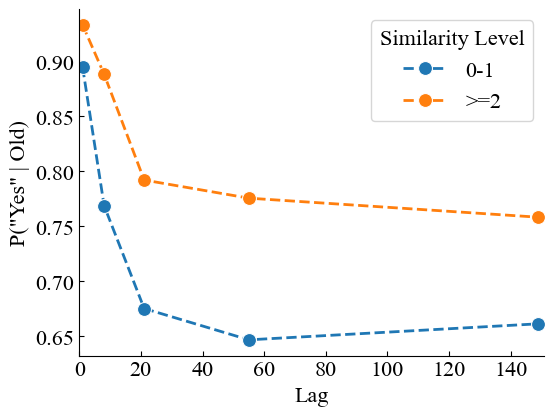

In [56]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, y='hr', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('P("Yes" | Old)')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_hr_{option}.pdf')

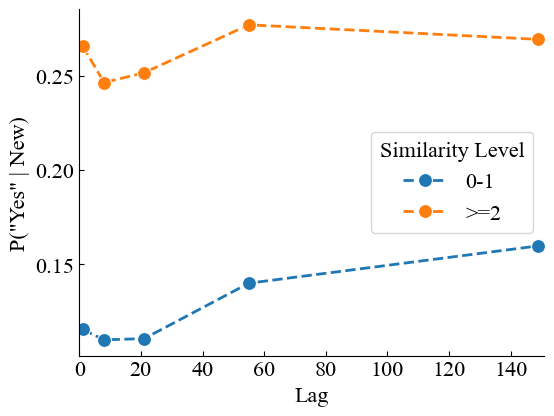

In [57]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, y='far', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('P("Yes" | New)')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_far_{option}.pdf')

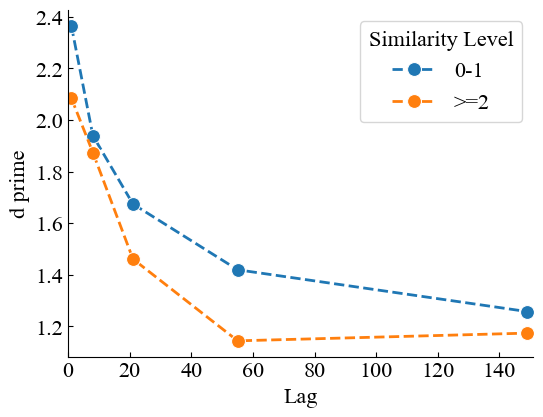

In [58]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, y='dprime', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('d prime')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_dprime_{option}.pdf')

In [59]:
df_hrfar = df_dprime.groupby(['roll_cat_len_level', 'log_lag_disp'])[['hr', 'far']].mean().reset_index()
hr_lowsim = df_hrfar.query('roll_cat_len_level == "0-1"').hr.to_numpy()
hr_highsim = df_hrfar.query('roll_cat_len_level == ">=2"').hr.to_numpy()
far_lowsim = df_hrfar.query('roll_cat_len_level == "0-1"').far.to_numpy()
far_highsim = df_hrfar.query('roll_cat_len_level == ">=2"').far.to_numpy()
hr_lowsim, hr_highsim, far_lowsim, far_highsim

(array([0.89471861, 0.76861626, 0.67512263, 0.64665596, 0.66123502]),
 array([0.93309138, 0.8881397 , 0.79195743, 0.77547827, 0.75816024]),
 array([0.11545705, 0.10995413, 0.11061262, 0.1399688 , 0.15975013]),
 array([0.26569987, 0.24629369, 0.25151437, 0.27688183, 0.26918713]))

In [60]:
hr_lowsim_gt = np.array([0.885, 0.853, 0.787, 0.682, 0.630])
hr_highsim_gt = np.array([0.893, 0.858, 0.795, 0.720, 0.671])
far_lowsim_gt = np.array([0.190, 0.190, 0.190, 0.195, 0.212])
far_highsim_gt = np.array([0.202, 0.210, 0.216, 0.229, 0.237]) # a bit diff from real gt
err = np.mean(np.power(hr_lowsim - hr_lowsim_gt, 2)) + np.mean(np.power(hr_highsim - hr_highsim_gt, 2)) \
    + np.mean(np.power(far_lowsim - far_lowsim_gt, 2)) + np.mean(np.power(far_highsim - far_highsim_gt, 2))
err

0.013829170598223441

### Az

In [61]:
def calculate_Az(df_tmp1):
    log_lag_bins = [0, 2, 3, 4, 5]
    Azs = []
    for bin in log_lag_bins:

        # get the df of this log_lag_bin
        col_name = "log_lag_bin_" + str(bin)
        df_tmp = df_tmp1.query(col_name + " == True").copy()

        # get variables
        conf = df_tmp.csim.to_numpy()
        truth = df_tmp.old.to_numpy()
        old_num = np.sum(truth)
        new_num = np.sum(~truth)
        is_old = truth
        is_new = ~truth

        if np.sum(truth) == 0 or np.sum(~truth) == 0:
            Azs.append(np.nan)
            continue
        
        min_conf = np.round(np.min(conf), 2)
        max_conf = np.round(np.max(conf), 2)
        if max_conf - min_conf < 0.05:  # 0.1
            Azs.append(np.nan)
            continue

        # calculate HR and FAR for different thresholds
        step = 0.01  # 0.02
        thresholds = np.arange(min_conf+step, max_conf, step)
        hrs = []
        fars = []
        old_conf = conf * is_old
        new_conf = conf * is_new
        for thresh in thresholds:
            # hr = (np.sum((conf > thresh) & is_old) + 0.5) / (old_num + 1)
            # far = (np.sum((conf > thresh) & is_new) + 0.5) / (new_num + 1)
            hr = (np.sum(old_conf > thresh) + 0.5) / (old_num + 1)
            far = (np.sum(new_conf > thresh) + 0.5) / (new_num + 1)
            hrs.append(hr)
            fars.append(far)

        # calculate z_hr and z_far
        z_hr = norm.ppf(hrs)
        z_far = norm.ppf(fars)

        # # linear regression on z_hr and z_far using sklearn
        # X = np.array(z_far).reshape(-1, 1)
        # y = np.array(z_hr)
        # reg = LinearRegression().fit(X, y)
        # # get slope and intercept 
        # slope = reg.coef_[0]
        # intercept = reg.intercept_

        # linear regression on z_hr and z_far manually
        n = len(z_far)
        X = np.column_stack((np.ones(n), z_far))
        beta = np.linalg.inv(X.T @ X) @ X.T @ z_hr
        intercept, slope = beta

        # get A_z
        Az = norm.cdf(intercept/np.sqrt(1+slope**2))
        Azs.append(Az)

    # df to return
    df_return = pd.DataFrame({'log_lag_bin': log_lag_bins, 'Az': Azs})
    
    return df_return

In [62]:
df_Az = df_simu.groupby(["session", "roll_cat_len_level"]).apply(calculate_Az).reset_index()
df_Az.drop(columns = 'level_2', inplace = True)
df_Az['log_lag_disp'] = np.ceil(np.e**df_Az.log_lag_bin)
df_Az

/var/folders/js/fb9kwys10ln8jgq1bxxqg0tr0000gn/T/ipykernel_51616/1777967579.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_Az = df_simu.groupby(["session", "roll_cat_len_level"]).apply(calculate_Az).reset_index()


,session,roll_cat_len_level,log_lag_bin,Az,log_lag_disp
0,0,0-1,0,0.849060,1.0
1,0,0-1,2,0.848157,8.0
2,0,0-1,3,0.833597,21.0
3,0,0-1,4,0.834678,55.0
4,0,0-1,5,0.832972,149.0
...,...,...,...,...,...
9995,999,>=2,0,0.899086,1.0
9996,999,>=2,2,0.913705,8.0
9997,999,>=2,3,0.769403,21.0
9998,999,>=2,4,0.618223,55.0


In [63]:
# pickup those rows where Az is Nan in df_Az
df_Az.loc[df_Az.Az.isna()]

,session,roll_cat_len_level,log_lag_bin,Az,log_lag_disp
19,1,>=2,5,NaN,149.0
24,2,0-1,5,NaN,149.0
29,2,>=2,5,NaN,149.0
34,3,0-1,5,NaN,149.0
38,3,>=2,4,NaN,55.0
...,...,...,...,...,...
9979,997,>=2,5,NaN,149.0
9985,998,>=2,0,NaN,1.0
9989,998,>=2,5,NaN,149.0
9994,999,0-1,5,NaN,149.0


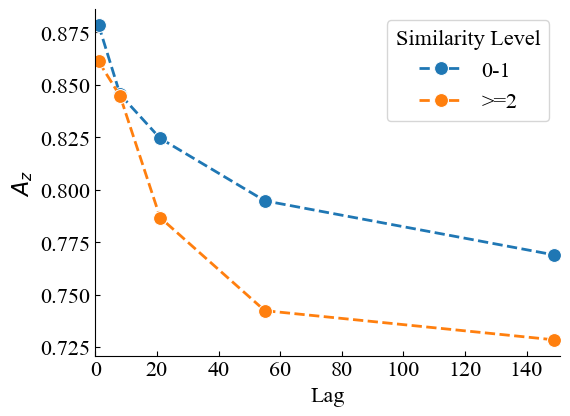

In [64]:
fig, ax = plt.subplots(figsize=(6,4.5))
# fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_Az, y='Az', x='log_lag_disp', hue = 'roll_cat_len_level', marker = 'o', markersize = 10, linestyle='--', lw=2, ax=ax, errorbar=None)
plt.ylabel('$A_z$')
plt.xlabel('Lag')
# ax.set(xlabel=None, ylabel=None)
# selected_lag = np.array([1,np.e,np.e**2,np.e**3,np.e**4,np.e**5])
# plt.xticks(ticks=selected_lag, labels = ['1','e','e2','e3','e4','e5'])
plt.xticks(ticks=np.arange(0,160,20))
# plt.ylim([0.58,0.92])
plt.xlim([0,151])
# legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='--',label = 'Low'),
#                    Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='o', markersize = 10, linestyle='--', label = 'High')]
# plt.legend(handles = legend_elements, title = "Similarity Level")
plt.legend(title = "Similarity Level")

# if SAVEFIG:
#     plt.savefig(f'simu1_fig/simu1_David_Az_{option}.pdf')

In [65]:
df_plot = df_Az.groupby(["roll_cat_len_level", "log_lag_bin"]).Az.mean().to_frame(name="Az").reset_index()
Az_lowsim = df_plot.query("roll_cat_len_level == '0-1'").Az.to_numpy()
Az_highsim = df_plot.query("roll_cat_len_level == '>=2'").Az.to_numpy()
Az_lowsim, Az_highsim

(array([0.87854811, 0.84538436, 0.82445324, 0.79468019, 0.76888125]),
 array([0.86111376, 0.84465352, 0.78670434, 0.74231819, 0.72841528]))

In [66]:
# ground truth
Az_lowsim_gt = np.array([0.82, 0.82, 0.80, 0.73, 0.63])
Az_highsim_gt = np.array([0.81, 0.78, 0.76, 0.69, 0.61])

# calculate the error
err = np.mean(np.power(Az_lowsim - Az_lowsim_gt, 2)) + np.mean(np.power(Az_highsim - Az_highsim_gt, 2))
err

0.01048138477851318